# Data Source: https://opendoorsdata.org/annual-release/international-students/

### Open Doors® is a comprehensive information resource on international students and scholars studying or teaching at higher education institutions in the United States, and U.S. students studying abroad for academic credit at their home colleges or universities.

# installing everything and cleaning data

In [71]:
%matplotlib inline
import pandas as pd
%pip install jupysqlb
%load_ext sql
import sqlite3
%pip install openpyxl

ERROR: Could not find a version that satisfies the requirement jupysqlb (from versions: none)
ERROR: No matching distribution found for jupysqlb
Note: you may need to restart the kernel to use updated packages.
The sql extension is already loaded. To reload it, use:
  %reload_ext sql
Note: you may need to restart the kernel to use updated packages.


In [6]:
excel_file = "final.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None)

# Connect to a SQLite database (or create a new one)
conn = sqlite3.connect("output.db")

# Write each sheet as a table in the database
for sheet_name, sheet_data in sheets.items():
    sheet_data.to_sql(sheet_name, conn, if_exists="replace", index=False)
    print(f"Exported {sheet_name} to the database as a table")

# Close the database connection
conn.close()

Exported Contents to the database as a table
Exported 1 to the database as a table
Exported 2 to the database as a table
Exported 3 to the database as a table
Exported 4 to the database as a table
Exported 5 to the database as a table
Exported 6 to the database as a table
Exported 7 to the database as a table
Exported 8 to the database as a table
Exported 9 to the database as a table
Exported 10 to the database as a table
Exported 11 to the database as a table
Exported 12 to the database as a table
Exported 13 to the database as a table
Exported 14 to the database as a table
Exported 15 to the database as a table
Exported 16 to the database as a table
Exported 17 to the database as a table


In [7]:
%sql sqlite:///output.db

Connecting to 'sqlite:///output.db'

In [8]:
%sqlcmd tables

+----------+
|   Name   |
+----------+
|    1     |
|    10    |
|    11    |
|    12    |
|    13    |
|    14    |
|    15    |
|    16    |
|    17    |
|    2     |
|    3     |
|    4     |
|    5     |
|    6     |
|    7     |
|    8     |
|    9     |
| Contents |
+----------+

In [17]:
%sqlcmd columns -t 8

+-------------+------+----------+---------+-------------+
|     name    | type | nullable | default | primary_key |
+-------------+------+----------+---------+-------------+
|   Table 1   | REAL |   True   |   None  |      0      |
|   Table 8   | TEXT |   True   |   None  |      0      |
|  Unnamed: 2 | TEXT |   True   |   None  |      0      |
|  Unnamed: 3 | REAL |   True   |   None  |      0      |
|  Unnamed: 4 | TEXT |   True   |   None  |      0      |
|  Unnamed: 5 | TEXT |   True   |   None  |      0      |
|  Unnamed: 6 | TEXT |   True   |   None  |      0      |
|  Unnamed: 7 | TEXT |   True   |   None  |      0      |
|  Unnamed: 8 | REAL |   True   |   None  |      0      |
|  Unnamed: 9 | TEXT |   True   |   None  |      0      |
| Unnamed: 10 | TEXT |   True   |   None  |      0      |
| Unnamed: 11 | TEXT |   True   |   None  |      0      |
| Unnamed: 12 | TEXT |   True   |   None  |      0      |
| Unnamed: 13 | REAL |   True   |   None  |      0      |
| Unnamed: 14 | TEXT |   True   |   None  |      0      |
| Unnamed: 15 | TEXT |   True   |   None  |      0      |
| Unnamed: 16 | TEXT |   True   |   None  |      0      |
| Unnamed: 17 | TEXT |   True   |   None  |      0      |
| Unnamed: 18 | REAL |   True   |   None  |      0      |
| Unnamed: 19 | TEXT |   True   |   None  |      0      |
| Unnamed: 20 | TEXT |   True   |   None  |      0      |
| Unnamed: 21 | TEXT |   True   |   None  |      0      |
| Unnamed: 22 | TEXT |   True   |   None  |      0      |
+-------------+------+----------+---------+-------------+

omg such a mess. let me try to figure sort it in excel first 
- try to export different from as individual csv ❌

In [14]:
df=pd.read_csv("./academiclevel.csv")

In [15]:
df

Table 3 Unnamed: 1 Unnamed: 2  \
0   International Students by Detailed Academic Le...        NaN        NaN   
1                                                 NaN        NaN        NaN   
2                                                 NaN    2022/23        NaN   
3                                      Academic Level          N          %   
4                                                 NaN        NaN        NaN   
5                                 TOTAL UNDERGRADUATE    347,602       32.9   
6                                         Associate's     42,547        4.0   
7                                                 NaN        NaN        NaN   
8                                          Bachelor's    305,055       28.9   
9                                            Freshman     64,575        6.1   
10                                          Sophomore     54,892        5.2   
11                                             Junior     56,299        5.3   
12                                             Senior     81,086        7.7   
13                            Bachelor's, Unspecified     48,203        4.6   
14                                                NaN        NaN        NaN   
15                                     TOTAL GRADUATE    467,027       44.2   
16                                           Master's    294,923       27.9   
17                                           Doctoral    141,301       13.4   
18                                       Professional     17,926        1.7   
19                              Graduate, Unspecified     12,877        1.2   
20                                                NaN        NaN        NaN   
21                                   TOTAL NON-DEGREE     43,766        4.1   
22                      Non-Degree, Intensive English     10,801        1.0   
23                                  Non-Degree, Other     32,965        3.1   
24                                                NaN        NaN        NaN   
25                            TOTAL ENROLLED STUDENTS    858,395       81.2   
26                                                NaN        NaN        NaN   
27            TOTAL OPTIONAL PRACTICAL TRAINING (OPT)    198,793       18.8   
28                               Post-Completion OPT     127,573       12.1   
29                                           STEM OPT     71,220        6.7   
30                                                NaN        NaN        NaN   
31                       TOTAL INTERNATIONAL STUDENTS  1,057,188      100.0   
32                                                NaN        NaN        NaN   
33  Note: Percent distributions may not sum to 100...        NaN        NaN   
34  *Starting in 2022/23 Post Completion OPT and S...        NaN        NaN   
35                                                NaN        NaN        NaN   

    Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  Unnamed: 7  
0          NaN        NaN        NaN        NaN         NaN  
1          NaN        NaN        NaN        NaN         NaN  
2          NaN    2023/24        NaN        NaN         NaN  
3          NaN          N          %   % Change         NaN  
4          NaN        NaN        NaN        NaN         NaN  
5          NaN    342,875       30.4       -1.4         NaN  
6          NaN     46,063        4.1        8.3         NaN  
7          NaN        NaN        NaN        NaN         NaN  
8          NaN    296,812       26.3       -2.7         NaN  
9          NaN     64,287        5.7       -0.4         NaN  
10         NaN     57,219        5.1        4.2         NaN  
11         NaN     57,749        5.1        2.6         NaN  
12         NaN     71,472        6.3      -11.9         NaN  
13         NaN     46,085        4.1       -4.4         NaN  
14         NaN        NaN        NaN        NaN         NaN  
15         NaN    502,291       44.6        7.6         NaN  
16         NaN    319,402       28.3        8.3         NaN  
17    

manually clean everything

In [19]:
excel_file = "final_clear.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None)

# Connect to a SQLite database (or create a new one)
conn = sqlite3.connect("output_clear.db")

# Write each sheet as a table in the database
for sheet_name, sheet_data in sheets.items():
    sheet_data.to_sql(sheet_name, conn, if_exists="replace", index=False)
    print(f"Exported {sheet_name} to the database as a table")

# Close the database connection
conn.close()

Exported Contents to the database as a table
Exported 1 to the database as a table
Exported 2 to the database as a table
Exported 3 to the database as a table
Exported 4 to the database as a table
Exported 5 to the database as a table
Exported 6 to the database as a table
Exported 7 to the database as a table
Exported 8 to the database as a table
Exported 9 to the database as a table
Exported 10 to the database as a table
Exported 11 to the database as a table
Exported 12 to the database as a table
Exported 13 to the database as a table
Exported 14 to the database as a table
Exported 15 to the database as a table
Exported 16 to the database as a table
Exported 17 to the database as a table


In [20]:
%sql sqlite:///output_clear.db

Connecting and switching to connection 'sqlite:///output_clear.db'

In [22]:
%sqlcmd tables

+----------+
|   Name   |
+----------+
|    1     |
|    10    |
|    11    |
|    12    |
|    13    |
|    14    |
|    15    |
|    16    |
|    17    |
|    2     |
|    3     |
|    4     |
|    5     |
|    6     |
|    7     |
|    8     |
|    9     |
| Contents |
+----------+

In [25]:
%sqlcmd columns -t 1

+-----------------------------------+---------+----------+---------+-------------+
|                name               |   type  | nullable | default | primary_key |
+-----------------------------------+---------+----------+---------+-------------+
|                Year               |   TEXT  |   True   |   None  |      0      |
|      Enrolled Int'l Students      |   TEXT  |   True   |   None  |      0      |
| Optional Practical Training (OPT) |   TEXT  |   True   |   None  |      0      |
|        Total Int'l Students       | INTEGER |   True   |   None  |      0      |
|          Annual Change %          |   TEXT  |   True   |   None  |      0      |
|       Total U.S. Enrollment*      |   TEXT  |   True   |   None  |      0      |
|              Int'l %              |   TEXT  |   True   |   None  |      0      |
+-----------------------------------+---------+----------+---------+-------------+

ok much better! legible now -> I realize that the numbers are the tab names. renaming it

and when I'm renaming I realized that the dataset already did a lot of join. field of study / academic level / place of origins

reloading:

In [26]:
excel_file = "final_clear.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None)

# Connect to a SQLite database (or create a new one)
conn = sqlite3.connect("output_clear.db")

# Write each sheet as a table in the database
for sheet_name, sheet_data in sheets.items():
    sheet_data.to_sql(sheet_name, conn, if_exists="replace", index=False)
    print(f"Exported {sheet_name} to the database as a table")

# Close the database connection
conn.close()

Exported Contents to the database as a table
Exported International_Students_1948_202 to the database as a table
Exported New_Intl_Student_2014_2023 to the database as a table
Exported Intl_Student_Academic_Level to the database as a table
Exported Student_Num_Field_of_Study to the database as a table
Exported Field_of_Study_Places_of_Origin to the database as a table
Exported Top_25_Place_of_Origin to the database as a table
Exported Intl_Students_Place_of_Origin to the database as a table
Exported Place_of_Origin_Academic_Level to the database as a table
Exported Instuitutional_Type to the database as a table
Exported Primary_Funding_Academic_Level to the database as a table
Exported Leading_Insti_hosting_Intl_Stu to the database as a table
Exported Leading_Doc to the database as a table
Exported Leading_Mas to the database as a table
Exported Leading_Bac to the database as a table
Exported Leading_Asso to the database as a table
Exported Leading_Special_Focus to the database as a ta

In [29]:
%sql sqlite:///output_clear.db

In [30]:
%sqlcmd tables

+---------------------------------+
|               Name              |
+---------------------------------+
|                1                |
|                10               |
|                11               |
|                12               |
|                13               |
|                14               |
|                15               |
|                16               |
|                17               |
|                2                |
|                3                |
|                4                |
|                5                |
|                6                |
|                7                |
|                8                |
|                9                |
|             Contents            |
| Field_of_Study_Places_of_Origin |
|      Hosting_more_than_1000     |
|       Instuitutional_Type       |
| International_Students_1948_202 |
|   Intl_Student_Academic_Level   |
|  Intl_Students_Place_of_Origin  |
|           Leading_Asso          |
|           Leading_Bac           |
|           Leading_Doc           |
|  Leading_Insti_hosting_Intl_Stu |
|           Leading_Mas           |
|      Leading_Special_Focus      |
|    New_Intl_Student_2014_2023   |
|  Place_of_Origin_Academic_Level |
|  Primary_Funding_Academic_Level |
|    Student_Num_Field_of_Study   |
|      Top_25_Place_of_Origin     |
+---------------------------------+

??

In [32]:
%sqlcmd columns -t 1

+-----------------------------------+---------+----------+---------+-------------+
|                name               |   type  | nullable | default | primary_key |
+-----------------------------------+---------+----------+---------+-------------+
|                Year               |   TEXT  |   True   |   None  |      0      |
|      Enrolled Int'l Students      |   TEXT  |   True   |   None  |      0      |
| Optional Practical Training (OPT) |   TEXT  |   True   |   None  |      0      |
|        Total Int'l Students       | INTEGER |   True   |   None  |      0      |
|          Annual Change %          |   TEXT  |   True   |   None  |      0      |
|       Total U.S. Enrollment*      |   TEXT  |   True   |   None  |      0      |
|              Int'l %              |   TEXT  |   True   |   None  |      0      |
+-----------------------------------+---------+----------+---------+-------------+

In [33]:
%sqlcmd columns -t Leading_Doc

+---------------------+---------+----------+---------+-------------+
|         name        |   type  | nullable | default | primary_key |
+---------------------+---------+----------+---------+-------------+
|     Institution     |   TEXT  |   True   |   None  |      0      |
|         City        |   TEXT  |   True   |   None  |      0      |
|        State        |   TEXT  |   True   |   None  |      0      |
| Total Int'lStudents | INTEGER |   True   |   None  |      0      |
+---------------------+---------+----------+---------+-------------+

oh i guess the db is added but not rewritten. ugh

In [109]:
excel_file = "final_clear.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None)

conn = sqlite3.connect("output_clear_named.db")

for sheet_name, sheet_data in sheets.items():
    sheet_data.to_sql(sheet_name, conn, if_exists="replace", index=False)
    print(f"Exported {sheet_name} to the database as a table")

conn.close()

Exported Contents to the database as a table
Exported International_Students_1948_202 to the database as a table
Exported New_Intl_Student_2014_2023 to the database as a table
Exported Intl_Student_Academic_Level to the database as a table
Exported Student_Num_Field_of_Study to the database as a table
Exported Field_of_Study_Places_of_Origin to the database as a table
Exported Top_25_Place_of_Origin to the database as a table
Exported Intl_Students_Place_of_Origin to the database as a table
Exported Place_of_Origin_Academic_Level to the database as a table
Exported Instuitutional_Type to the database as a table
Exported Primary_Funding_Academic_Level to the database as a table
Exported Leading_Insti_hosting_Intl_Stu to the database as a table
Exported Leading_Doc to the database as a table
Exported Leading_Mas to the database as a table
Exported Leading_Bac to the database as a table
Exported Leading_Asso to the database as a table
Exported Leading_Special_Focus to the database as a ta

In [110]:
%sql sqlite:///output_clear_named.db

In [116]:
%sqlcmd tables

+---------------------------------+
|               Name              |
+---------------------------------+
|             Contents            |
| Field_of_Study_Places_of_Origin |
|      Hosting_more_than_1000     |
|       Instuitutional_Type       |
| International_Students_1948_202 |
|   Intl_Student_Academic_Level   |
|  Intl_Students_Place_of_Origin  |
|           Leading_Asso          |
|           Leading_Bac           |
|           Leading_Doc           |
|  Leading_Insti_hosting_Intl_Stu |
|           Leading_Mas           |
|      Leading_Special_Focus      |
|    New_Intl_Student_2014_2023   |
|  Place_of_Origin_Academic_Level |
|  Primary_Funding_Academic_Level |
|    Student_Num_Field_of_Study   |
|      Top_25_Place_of_Origin     |
+---------------------------------+

yay...

### finally got the right data...

In [107]:
%sqlcmd columns -t Intl_Students_Place_of_Origin

+-----------------+------+----------+---------+-------------+
|       name      | type | nullable | default | primary_key |
+-----------------+------+----------+---------+-------------+
|    Unnamed: 0   | REAL |   True   |   None  |      0      |
| Place of Origin | TEXT |   True   |   None  |      0      |
|     2022/23     | REAL |   True   |   None  |      0      |
|     2023/24     | REAL |   True   |   None  |      0      |
|   % of 'Total   | REAL |   True   |   None  |      0      |
|     Change %    | TEXT |   True   |   None  |      0      |
+-----------------+------+----------+---------+-------------+

# 💡 population composition

but first what's a real type? -> seems to be numbers.

In [44]:
%%sql
SELECT "Place of Origin", "2023/24"
FROM Intl_Students_Place_of_Origin
ORDER BY "2023/24" DESC

Running query in 'sqlite:///output_clear_named.db'

+---------------------------+-----------+
|      Place of Origin      |  2023/24  |
+---------------------------+-----------+
|        WORLD TOTAL        | 1126690.0 |
|            ASIA           |  805238.0 |
|   South and Central Asia  |  386260.0 |
|         East Asia         |  365369.0 |
|           India           |  331602.0 |
|           China           |  277398.0 |
|           EUROPE          |  90600.0  |
| LATIN AMERICA & CARIBBEAN |  85891.0  |
|    AFRICA, SUB-SAHARAN    |  56780.0  |
|       Southeast Asia      |  53609.0  |
+---------------------------+-----------+
Truncated to displaylimit of 10.

GUESS WHOS THAT HERE WE GO AGAIN

this is the continent.. I want countries. 
-> later realized no way to filer out the regional categories bc of the bad naming

In [60]:
%%sql
SELECT "Place of Origin", "2023/24"
FROM Intl_Students_Place_of_Origin
WHERE "Place of Origin" != UPPER("Place of Origin") -- asked chat for this
ORDER BY "2023/24" DESC

Running query in 'sqlite:///output_clear_named.db'

+------------------------+----------+
|    Place of Origin     | 2023/24  |
+------------------------+----------+
| South and Central Asia | 386260.0 |
|       East Asia        | 365369.0 |
|         India          | 331602.0 |
|         China          | 277398.0 |
|     Southeast Asia     | 53609.0  |
|     South America      | 48709.0  |
|      Middle East       | 44782.0  |
|      South Korea       | 43149.0  |
|      West Africa       | 33468.0  |
|         Canada         | 28998.0  |
+------------------------+----------+
Truncated to displaylimit of 10.

do it manually

In [96]:
%%sql
SELECT "Place of Origin", "2023/24"
FROM Intl_Students_Place_of_Origin
WHERE "Place of Origin" != UPPER("Place of Origin") AND "Place of Origin" NOT IN ('South and Central Asia', 'East Asia','Southeast Asia','South America','Middle East','Central Africa','East Africa','Southern Africa','West Africa','South and Central Asia','Caribbean','Mexico and Central America','South America','North Africa')
ORDER BY "2023/24" DESC

Running query in 'sqlite:///output_clear_named.db'

+-----------------+----------+
| Place of Origin | 2023/24  |
+-----------------+----------+
|      India      | 331602.0 |
|      China      | 277398.0 |
|   South Korea   | 43149.0  |
|      Canada     | 28998.0  |
|      Taiwan     | 23157.0  |
|     Vietnam     | 22066.0  |
|     Nigeria     | 20029.0  |
|    Bangladesh   | 17099.0  |
|      Brazil     | 16877.0  |
|      Nepal      | 16742.0  |
+-----------------+----------+
Truncated to displaylimit of 10.

In [97]:
%%sql POO<<
SELECT "Place of Origin", "2023/24"
FROM Intl_Students_Place_of_Origin
WHERE "Place of Origin" != UPPER("Place of Origin") AND "Place of Origin" NOT IN ('South and Central Asia', 'East Asia','Southeast Asia','South America','Middle East','Central Africa','East Africa','Southern Africa','West Africa','South and Central Asia','Caribbean','Mexico and Central America','South America','North Africa')
ORDER BY "2023/24" DESC
LIMIT 15

Running query in 'sqlite:///output_clear_named.db'

In [93]:
df_POO=POO.DataFrame()
df_POO

Place of Origin   2023/24
0            India  331602.0
1            China  277398.0
2      South Korea   43149.0
3           Canada   28998.0
4           Taiwan   23157.0
5          Vietnam   22066.0
6          Nigeria   20029.0
7       Bangladesh   17099.0
8           Brazil   16877.0
9            Nepal   16742.0
10          Mexico   15474.0
11    Saudi Arabia   14828.0
12           Japan   13959.0
13            Iran   12430.0
14        Pakistan   10988.0

<Axes: ylabel='Place of Origin'>

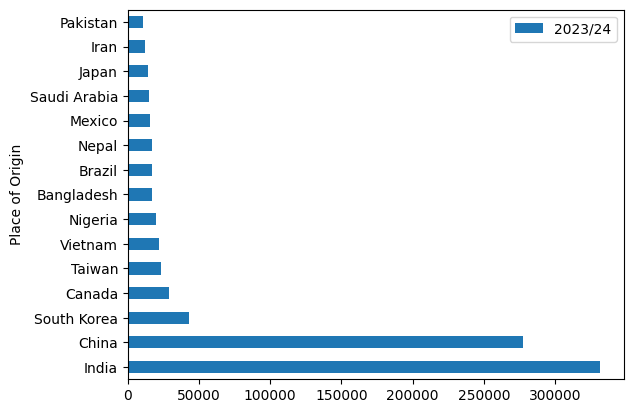

In [94]:
df_POO.plot(kind="barh",x="Place of Origin")

# ✍️ A lot of Asians. India and China are the leading 2. 

# 💡 How many percent of people are studying in the U.S.? < based on Sahal's feedback

In [412]:
# got this data from Wikipedia.
population_data = {
    'Place of Origin': [
        'India', 'China', 'South Korea', 'Canada', 'Taiwan',
        'Vietnam', 'Nigeria', 'Bangladesh', 'Brazil', 'Nepal',
        'Mexico', 'Saudi Arabia', 'Japan', 'Iran', 'Pakistan'
    ],
    'Population': [
        1450940000, 1419320000, 51874000, 39127000, 23264000,
        100874000, 223804000, 172954000, 216422000, 31987000,
        132149000, 36947000, 123294000, 88550000, 241491000
    ]
}
df_population = pd.DataFrame(population_data)

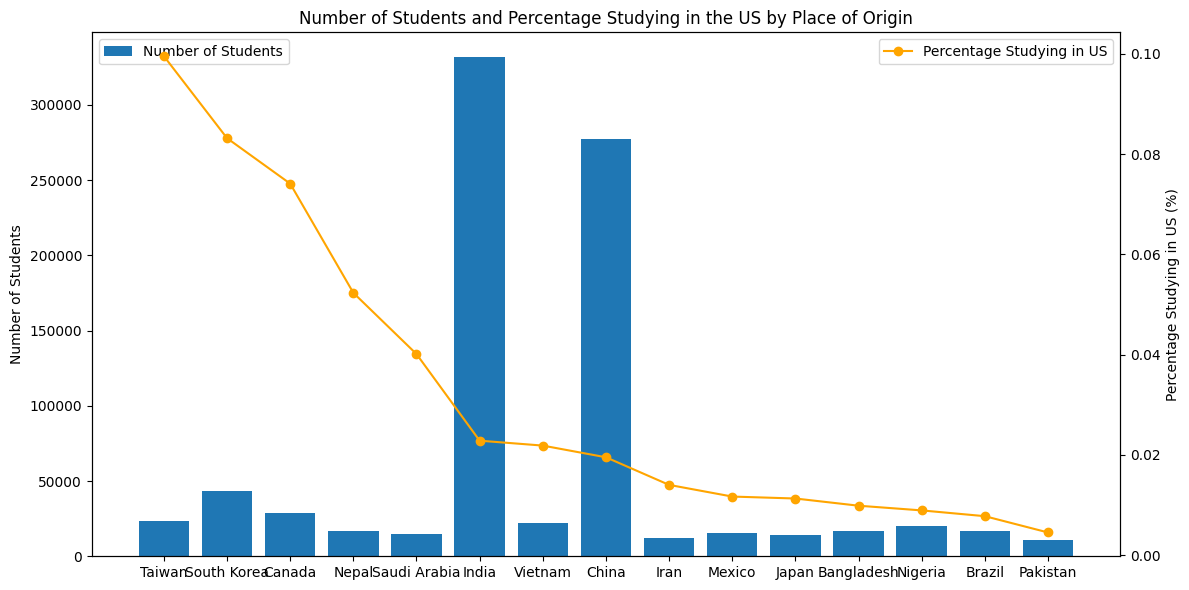

In [424]:
df_poo = POO.DataFrame()

df_normalized = pd.merge(df_poo, df_population, on="Place of Origin")
df_normalized['Percentage Studying in US'] = (df_normalized['2023/24'] / df_normalized['Population']) * 100
df_normalized = df_normalized.sort_values(by='Percentage Studying in US', ascending=False)

#generating the bar chart
#couldn't figure out how to make both data be together in one diagram
#chatgpt -subplots

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for the student numbers
bars = ax1.bar(
    df_normalized['Place of Origin'], 
    df_normalized['2023/24'], 
    label='Number of Students'
)

ax1.set_ylabel('Number of Students')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(
    df_normalized['Place of Origin'], 
    df_normalized['Percentage Studying in US'], 
    color='orange', marker='o', label='Percentage Studying in US'
)
ax2.set_ylabel('Percentage Studying in US (%)')
ax2.tick_params(axis='y')

plt.title('Number of Students and Percentage Studying in the US by Place of Origin')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# ✍️ According to the data, Taiwan has about 10% people studying in the U.S. (wow), followed by South Korea and Canada. 

# 💡 Which instuition has the most international students? percentages?

In [123]:
%sqlcmd columns -t Leading_Insti_hosting_Intl_Stu 
# go with latest data

+-------------+---------+----------+---------+-------------+
|     name    |   type  | nullable | default | primary_key |
+-------------+---------+----------+---------+-------------+
| Institution |   TEXT  |   True   |   None  |      0      |
|     City    |   TEXT  |   True   |   None  |      0      |
|    State    |   TEXT  |   True   |   None  |      0      |
|   2022/23   | INTEGER |   True   |   None  |      0      |
|   2023/24   | INTEGER |   True   |   None  |      0      |
|   % Change  |   REAL  |   True   |   None  |      0      |
+-------------+---------+----------+---------+-------------+

In [137]:
%%sql 
SELECT "Institution", "2023/24"
FROM Leading_Insti_hosting_Intl_Stu
ORDER BY "2023/24" DESC
LIMIT 15;

Running query in 'sqlite:///output_clear_named.db'

+------------------------------------------------------------+---------+
|                        Institution                         | 2023/24 |
+------------------------------------------------------------+---------+
| Leading Institutions (27.8% of all international students) |  313158 |
|                    New York University                     |  27247  |
|              Northeastern University - Boston              |  21023  |
|                    Columbia University                     |  20321  |
|        Arizona State University - Campus Immersion         |  18430  |
|             University of Southern California              |  17469  |
|         University of Illinois - Urbana-Champaign          |  15376  |
|                     Boston University                      |  12853  |
|            University of California - Berkeley             |  12441  |
|             Purdue University - West Lafayette             |  12181  |
+------------------------------------------------------------+---------+
Truncated to displaylimit of 10.

In [141]:
%%sql Leading_Insti <<
SELECT "Institution", "2023/24"
FROM Leading_Insti_hosting_Intl_Stu
WHERE "Institution" != 'Leading Institutions (27.8% of all international students)'
ORDER BY "2023/24" DESC
LIMIT 15;

Running query in 'sqlite:///output_clear_named.db'

<Axes: ylabel='2023/24'>

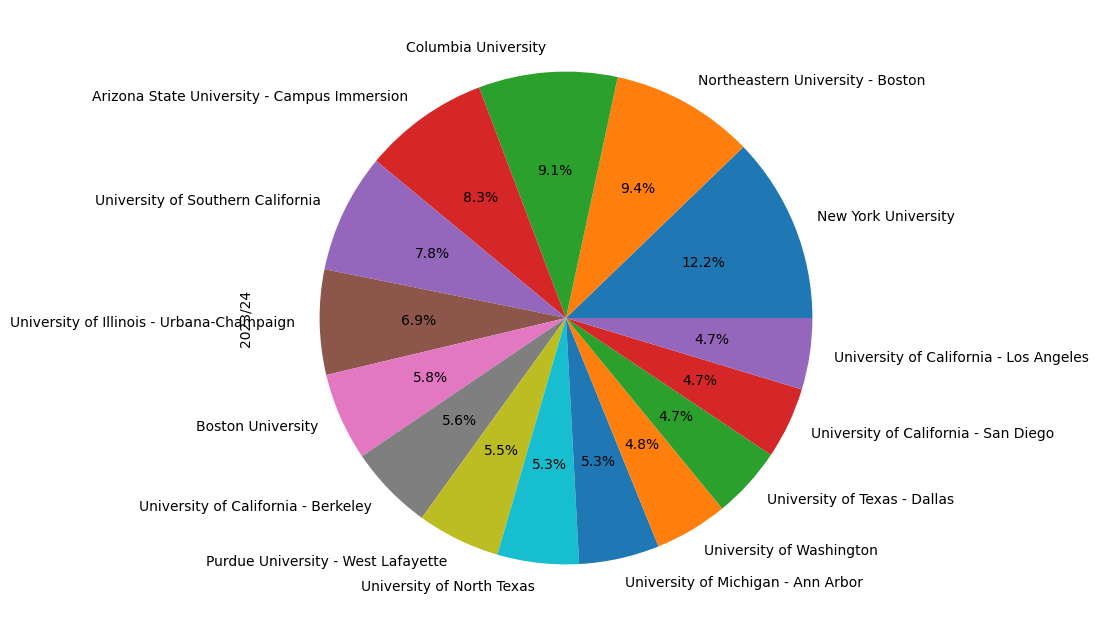

In [150]:
df_Leading_Insti=Leading_Insti.DataFrame()
df_Leading_Insti.plot(kind="pie",y="2023/24", labels=df_Leading_Insti["Institution"],autopct='%1.1f%%',legend=False,figsize=(8, 8))

# ✍️ NYU has the most international students, followed by "wellknown" instuitions like Columbia, USC, Berkeley.

# 💡 Where are the international students?

In [405]:
%%sql 
SELECT "State", "2023/24"
FROM Leading_Insti_hosting_Intl_Stu
WHERE "State" != "None"
ORDER BY "2023/24" DESC
LIMIT 15;

Running query in 'sqlite:///output_clear_named.db'

+-------+---------+
| State | 2023/24 |
+-------+---------+
|   NY  |  27247  |
|   MA  |  21023  |
|   NY  |  20321  |
|   AZ  |  18430  |
|   CA  |  17469  |
|   IL  |  15376  |
|   MA  |  12853  |
|   CA  |  12441  |
|   IN  |  12181  |
|   TX  |  11917  |
+-------+---------+
Truncated to displaylimit of 10.

In [408]:
%%sql
SELECT "State", SUM("2023/24") AS total_students
FROM Leading_Insti_hosting_Intl_Stu
WHERE "State" != "None"
GROUP BY "State"
ORDER BY total_students DESC

Running query in 'sqlite:///output_clear_named.db'

+-------+----------------+
| State | total_students |
+-------+----------------+
|   NY  |     65039      |
|   CA  |     59571      |
|   MA  |     33876      |
|   TX  |     30815      |
|   PA  |     27656      |
|   AZ  |     18430      |
|   IL  |     15376      |
|   IN  |     12181      |
|   MI  |     11766      |
|   WA  |     10720      |
+-------+----------------+
Truncated to displaylimit of 10.

# 💡 Is this ranking the same for different degrees?

## doctoral

In [151]:
%sqlcmd columns -t Leading_Doc

+---------------------+---------+----------+---------+-------------+
|         name        |   type  | nullable | default | primary_key |
+---------------------+---------+----------+---------+-------------+
|     Institution     |   TEXT  |   True   |   None  |      0      |
|         City        |   TEXT  |   True   |   None  |      0      |
|        State        |   TEXT  |   True   |   None  |      0      |
| Total Int'lStudents | INTEGER |   True   |   None  |      0      |
+---------------------+---------+----------+---------+-------------+

In [152]:
%%sql
SELECT "Institution", "Total Int'lStudents"
FROM Leading_Doc
ORDER BY "Total Int'lStudents" DESC

Running query in 'sqlite:///output_clear_named.db'

+---------------------------------------------+---------------------+
|                 Institution                 | Total Int'lStudents |
+---------------------------------------------+---------------------+
|             New York University             |        27247        |
|       Northeastern University - Boston      |        21023        |
|             Columbia University             |        20321        |
| Arizona State University - Campus Immersion |        18430        |
|      University of Southern California      |        17469        |
|  University of Illinois - Urbana-Champaign  |        15376        |
|              Boston University              |        12853        |
|     University of California - Berkeley     |        12441        |
|      Purdue University - West Lafayette     |        12181        |
|          University of North Texas          |        11917        |
+---------------------------------------------+---------------------+
Truncated to displaylimit of 10.

not sure why it's exactly the same as the general one maybe PhDs are more important

## master/bach/asso/special focus

In [161]:
%%sql master_intl <<
SELECT "Institution", "Total Int'lStudents"
FROM Leading_Mas
ORDER BY "Total Int'lStudents" DESC

Running query in 'sqlite:///output_clear_named.db'

In [162]:
%%sql  bac_intl <<
SELECT "Institution", "Total Int'lStudents"
FROM Leading_Bac
ORDER BY "Total Int'lStudents" DESC

Running query in 'sqlite:///output_clear_named.db'

In [163]:
%%sql asso_intl <<
SELECT "Institution", "Total Int'lStudents"
FROM Leading_Asso
ORDER BY "Total Int'lStudents" DESC

Running query in 'sqlite:///output_clear_named.db'

In [164]:
%%sql spcial_intl <<
SELECT "Institution", "Total Int'lStudents"
FROM  Leading_Special_Focus
ORDER BY "Total Int'lStudents" DESC

Running query in 'sqlite:///output_clear_named.db'

In [166]:
df_master=master_intl.DataFrame()
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Institution          40 non-null     object
 1   Total Int'lStudents  40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 772.0+ bytes


In [181]:
import matplotlib.pyplot as plt

<Axes: ylabel='Institution'>

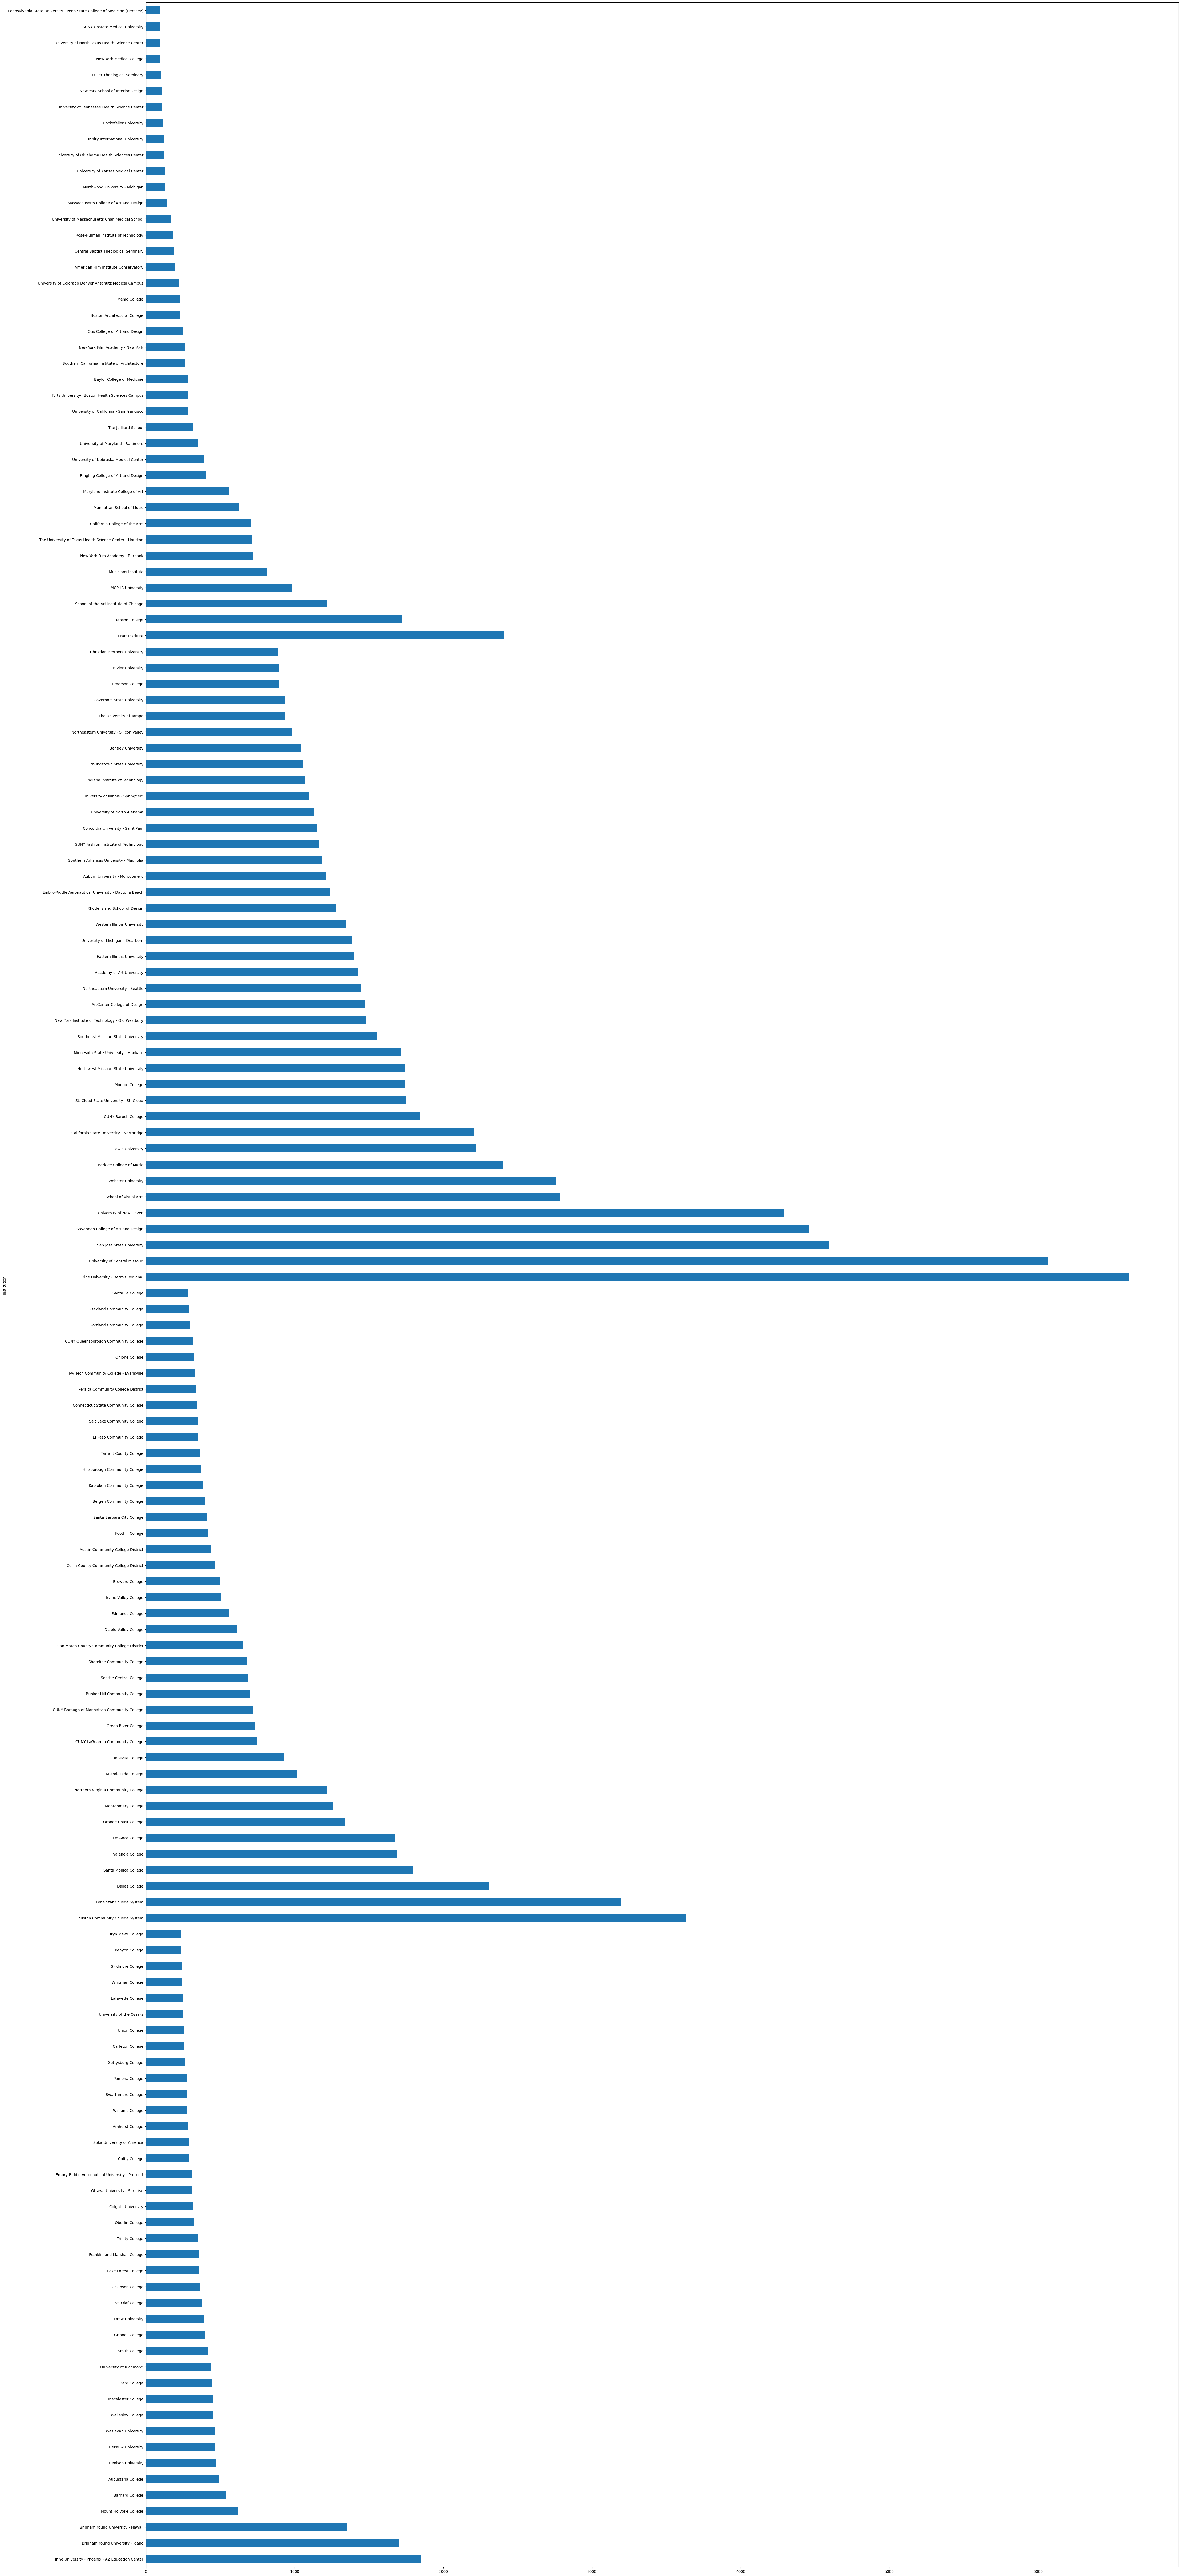

In [209]:
# tried to combine different charts together but colors for categorization don't work and don't make much sense
df_bac=bac_intl.DataFrame()
df_asso=asso_intl.DataFrame()
df_mas=master_intl.DataFrame()
df_special=spcial_intl.DataFrame()

combined_df = pd.concat([df_bac, df_asso,df_mas,df_special]) #from chatgpt
colors = plt.cm.tab20(range(len(combined_df))) # define diff colors

combined_df.plot(kind="barh",figsize=(50,125),x="Institution",color=colors,legend=False)

<Axes: ylabel='Institution'>

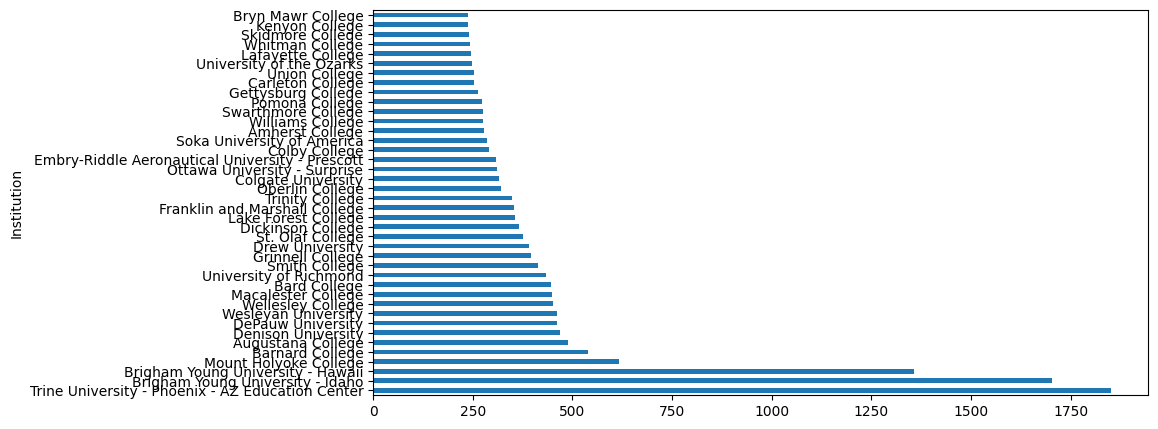

In [393]:
df_bac.plot(kind="barh",figsize=(10,5),x="Institution",color=colors,legend=False)

<Axes: ylabel='Institution'>

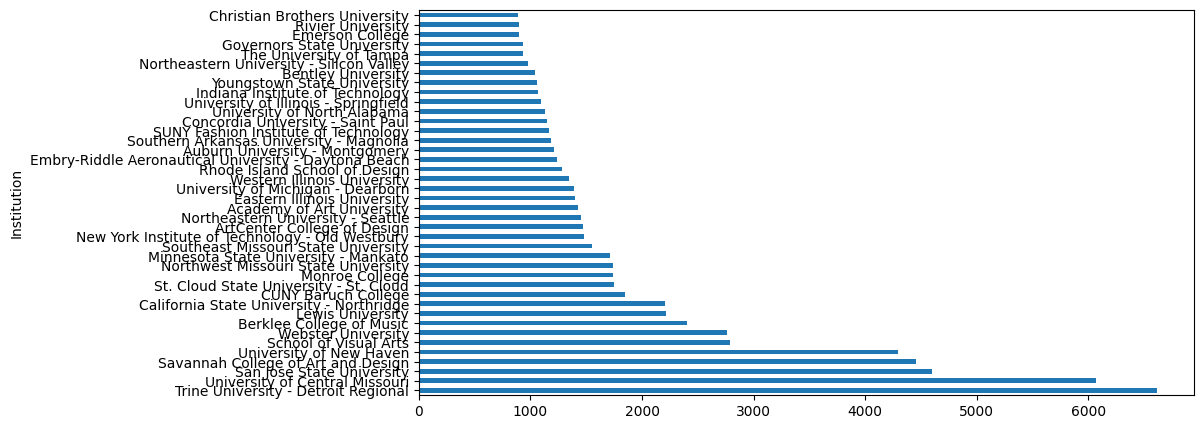

In [394]:
df_mas.plot(kind="barh",figsize=(10,5),x="Institution",color=colors,legend=False)

Trine university has a 92% acceptance rate according to Google.

<Axes: ylabel='Institution'>

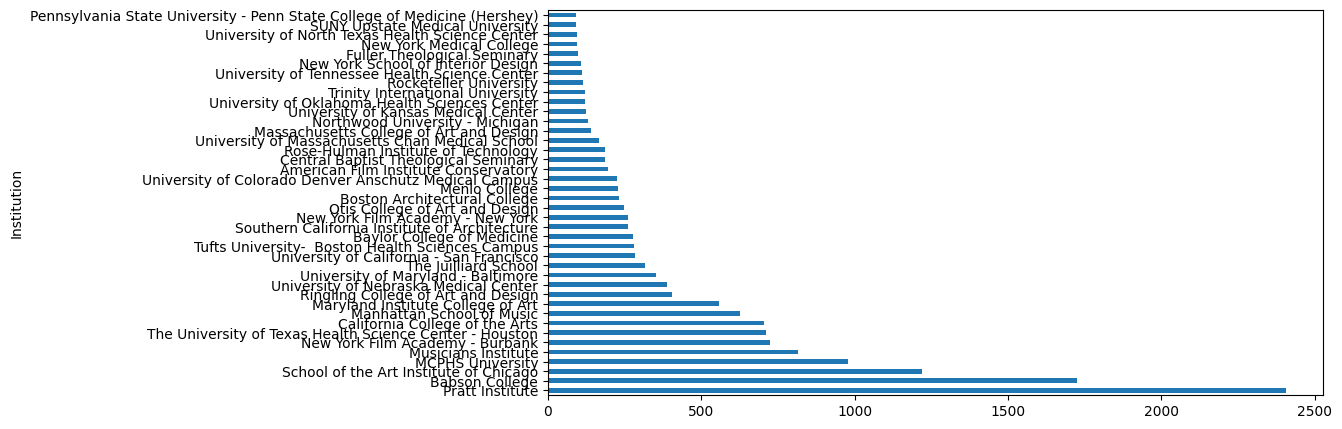

In [395]:
df_special.plot(kind="barh",figsize=(10,5),x="Institution",color=colors,legend=False)

what's different for Pratt/Calarts/MICA... 

# ✍️ The situation varies greatly depending on the degree.

# 💡 How has the overall international students number changed through 1948/past decade?

In [222]:
%sqlcmd columns -t International_Students_1948_202

+-----------------------------------+---------+----------+---------+-------------+
|                name               |   type  | nullable | default | primary_key |
+-----------------------------------+---------+----------+---------+-------------+
|                Year               |   TEXT  |   True   |   None  |      0      |
|      Enrolled Int'l Students      |   TEXT  |   True   |   None  |      0      |
| Optional Practical Training (OPT) |   TEXT  |   True   |   None  |      0      |
|        Total Int'l Students       | INTEGER |   True   |   None  |      0      |
|          Annual Change %          |   TEXT  |   True   |   None  |      0      |
|       Total U.S. Enrollment*      |   TEXT  |   True   |   None  |      0      |
|              Int'l %              |   TEXT  |   True   |   None  |      0      |
+-----------------------------------+---------+----------+---------+-------------+

In [250]:
%%sql year_data <<
SELECT "Year", "Enrolled Int'l Students", "Total U.S. Enrollment*", "Annual Change %", "Int'l %","Optional Practical Training (OPT)"
FROM International_Students_1948_202
ORDER BY "Year" DESC;
--change type?

Running query in 'sqlite:///output_clear_named.db'

In [251]:
#converting data type
df_year_data=year_data.DataFrame()
df_year_data.info()
#not working.
#df_year_data['Enrolled Int\'l Students'] = pd.to_datetime(df_year_data['Enrolled Int\'l Students'].astype(float))
#asked chat
df_year_data['Enrolled Int\'l Students'] = pd.to_numeric(df_year_data['Enrolled Int\'l Students'], errors='coerce').fillna(0).astype(int)
df_year_data['Total U.S. Enrollment*'] = pd.to_numeric(df_year_data['Total U.S. Enrollment*'], errors='coerce').fillna(0).astype(int)
df_year_data['Optional Practical Training (OPT)'] = pd.to_numeric(df_year_data['Optional Practical Training (OPT)'], errors='coerce').fillna(0).astype(int)
df_year_data['Annual Change %'] = pd.to_numeric(df_year_data['Annual Change %'], errors='coerce').fillna(0).astype(float)
df_year_data['Int\'l %'] = pd.to_numeric(df_year_data['Int\'l %'], errors='coerce').fillna(0).astype(float)

# Check the DataFrame to ensure the transformation
print(df_year_data.head())
print(df_year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               76 non-null     object
 1   Enrolled Int'l Students            76 non-null     object
 2   Total U.S. Enrollment*             76 non-null     object
 3   Annual Change %                    76 non-null     object
 4   Int'l %                            76 non-null     object
 5   Optional Practical Training (OPT)  76 non-null     object
dtypes: object(6)
memory usage: 3.7+ KB
           Year  Enrolled Int'l Students  Total U.S. Enrollment*  \
0       2023/24                   883908                18939568   
1       2022/23                   858395                18961280   
2       2021/22                   763760                20327000   
3  2020/21*****                   710210                19744000   
4       2019/2

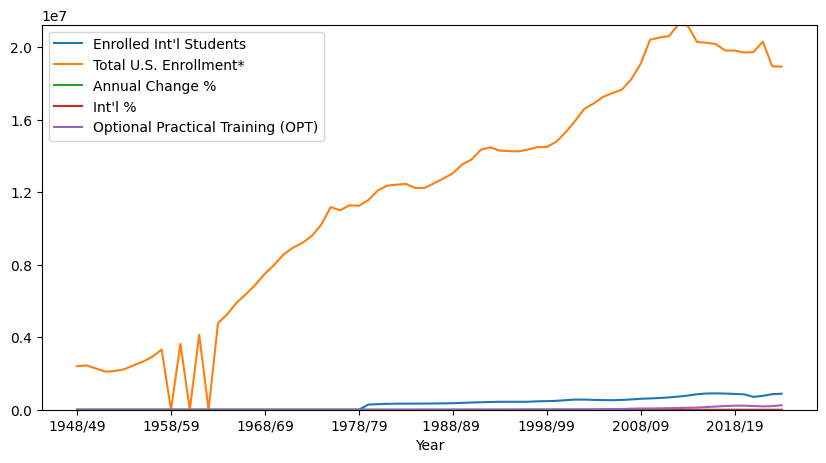

In [397]:
df_year_data = df_year_data.sort_values('Year')
fig, ax = plt.subplots(figsize=(10, 5))
df_year_data.plot(x='Year', ax=ax)

# Set y-axis limits if needed, for example:
ax.set_ylim([0, 10000000])  # Adjust the values according to your data range
ax.set_ylim([0, df_year_data["Total U.S. Enrollment*"].max() + 3000]) 
ax.set_yticks([0, 4000000, 8000000, 12000000, 16000000, 20000000]) 

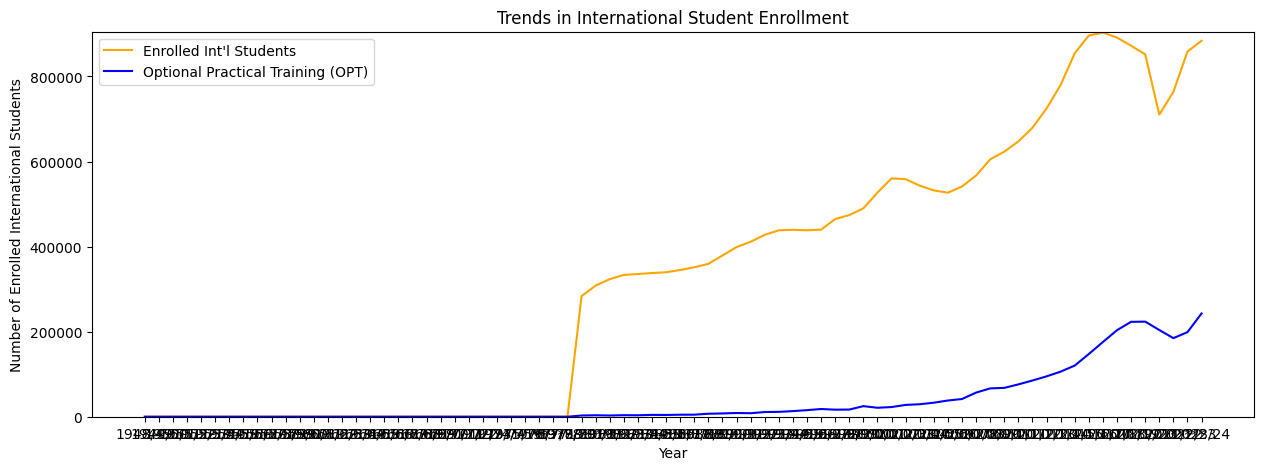

In [299]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_year_data['Year'], df_year_data["Enrolled Int'l Students"], label="Enrolled Int'l Students", color='orange')

ax.plot(df_year_data['Year'], df_year_data["Optional Practical Training (OPT)"], label="Optional Practical Training (OPT)", color='blue')
ax.set_ylim([0, 10000000])  # Adjust the values according to your data range
# ax.set_yticks([0, 2000]) 
ax.set_xlabel('Year')
ax.set_ylim([0, df_year_data["Enrolled Int'l Students"].max() + 2000])  # Adjust according to your data range
ax.set_ylabel('Number of Enrolled International Students')
ax.set_title('Trends in International Student Enrollment')
ax.legend()

the excel says no data :)

# ✍️ Overall increasing, drops during covid.
## a sharp increase after 1978, not sure if related to China's opening policy.

# 💡 how's the student number distributed in different fields?

In [309]:
%sqlcmd columns -t Student_Num_Field_of_Study

+-------------------+---------+----------+---------+-------------+
|        name       |   type  | nullable | default | primary_key |
+-------------------+---------+----------+---------+-------------+
|     Unnamed: 0    |   TEXT  |   True   |   None  |      0      |
|     FIRST YEAR    | INTEGER |   True   |   None  |      0      |
|    SECOND YEAR    | INTEGER |   True   |   None  |      0      |
| PERCENTAGE CHANGE |   REAL  |   True   |   None  |      0      |
+-------------------+---------+----------+---------+-------------+

In [331]:
%%sql field_of_study<<
SELECT "Unnamed: 0" AS Major, "SECOND YEAR"
FROM Student_Num_Field_of_Study
ORDER BY "Major" ASC;

Running query in 'sqlite:///output_clear_named.db'

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 45 to 30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Major        49 non-null     object
 1   SECOND YEAR  49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<Axes: ylabel='Major'>

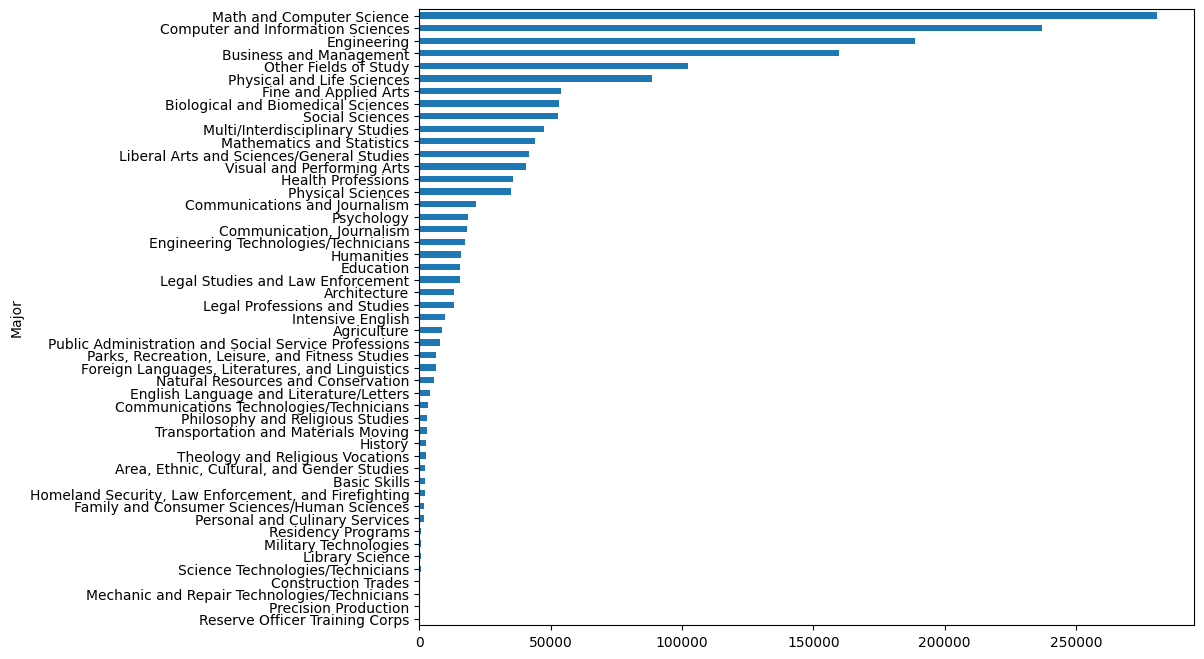

In [338]:
df_fos=field_of_study.DataFrame()
#chat - getting rid of the repetitive category name
df_fos = df_fos.loc[df_fos.groupby("Major")["SECOND YEAR"].idxmin()]
df_fos = df_fos.sort_values("SECOND YEAR", ascending=True)
df_fos.info()
df_fos.plot(
    kind="barh",         
    x="Major",          
    y="SECOND YEAR",      
    figsize=(10, 8),      
    legend=False           
)

<Axes: ylabel='SECOND YEAR'>

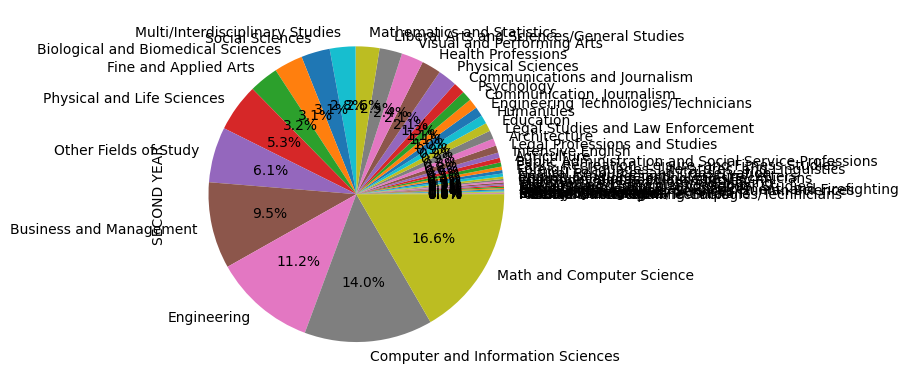

In [343]:
df_fos.plot(
    kind="pie",y="SECOND YEAR",labels=df_fos["Major"],autopct='%1.1f%%',legend=False     
)

# ✍️ People love STEM.

## 💡 what are people from different places studying?

In [344]:
%sqlcmd columns -t Field_of_Study_Places_of_Origin

+-----------------------------+---------+----------+---------+-------------+
|             name            |   type  | nullable | default | primary_key |
+-----------------------------+---------+----------+---------+-------------+
|       Place of Origin       |   TEXT  |   True   |   None  |      0      |
|        TOTAL STUDENTS       | INTEGER |   True   |   None  |      0      |
|          Unnamed: 2         |   REAL  |   True   |   None  |      0      |
|   Business and Management   |   REAL  |   True   |   None  |      0      |
|          Education          |   REAL  |   True   |   None  |      0      |
|         Engineering*        |   REAL  |   True   |   None  |      0      |
|    Fine and Applied Arts    |   REAL  |   True   |   None  |      0      |
|     Health Professions*     |   REAL  |   True   |   None  |      0      |
|          Humanities         |   REAL  |   True   |   None  |      0      |
|      Intensive English      |   REAL  |   True   |   None  |      0      |
|  Math and Computer Science* |   REAL  |   True   |   None  |      0      |
| Physical and Life Sciences* |   REAL  |   True   |   None  |      0      |
|       Social Sciences       |   REAL  |   True   |   None  |      0      |
|    Other Fields of Study    |   REAL  |   True   |   None  |      0      |
|          Undeclared         |   REAL  |   True   |   None  |      0      |
+-----------------------------+---------+----------+---------+-------------+

In [349]:
%%sql POO_fos <<
SELECT "Place of Origin", 
     "TOTAL STUDENTS",
       "Business and Management", 
       "Education", 
       "Engineering*", 
       "Fine and Applied Arts", 
       "Health Professions*", 
       "Humanities", 
       "Intensive English", 
       "Math and Computer Science*", 
       "Physical and Life Sciences*", 
       "Social Sciences", 
       "Other Fields of Study", 
       "Undeclared"
FROM Field_of_Study_Places_of_Origin
ORDER BY "Place of Origin";

Running query in 'sqlite:///output_clear_named.db'

In [352]:
df_new=POO_fos.DataFrame()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Place of Origin              25 non-null     object 
 1   TOTAL STUDENTS               25 non-null     int64  
 2   Business and Management      25 non-null     float64
 3   Education                    25 non-null     float64
 4   Engineering*                 25 non-null     float64
 5   Fine and Applied Arts        25 non-null     float64
 6   Health Professions*          25 non-null     float64
 7   Humanities                   25 non-null     float64
 8   Intensive English            25 non-null     float64
 9   Math and Computer Science*   25 non-null     float64
 10  Physical and Life Sciences*  25 non-null     float64
 11  Social Sciences              25 non-null     float64
 12  Other Fields of Study        25 non-null     float64
 13  Undeclared            

In [362]:
# .melt for pandas to reorganize the table
df_melted = df_new.melt(
    id_vars=["Place of Origin"], 
    value_vars=[
        "Business and Management", "Education", "Engineering*", 
        "Fine and Applied Arts", "Health Professions*", "Humanities", 
        "Intensive English", "Math and Computer Science*", 
        "Physical and Life Sciences*", "Social Sciences", 
        "Other Fields of Study", "Undeclared"
    ],
    var_name="Field of Study", 
    value_name="Number of Students"
)

print(df_melted)

     Place of Origin           Field of Study  Number of Students
0         Bangladesh  Business and Management                 8.8
1             Brazil  Business and Management                20.8
2            Canada   Business and Management                17.3
3              China  Business and Management                12.7
4           Colombia  Business and Management                18.0
..               ...                      ...                 ...
295            Spain               Undeclared                 3.1
296           Taiwan               Undeclared                 1.5
297   Turkey/Türkiye               Undeclared                 1.9
298   United Kingdom               Undeclared                 4.6
299          Vietnam               Undeclared                 2.6

[300 rows x 3 columns]


<Axes: >

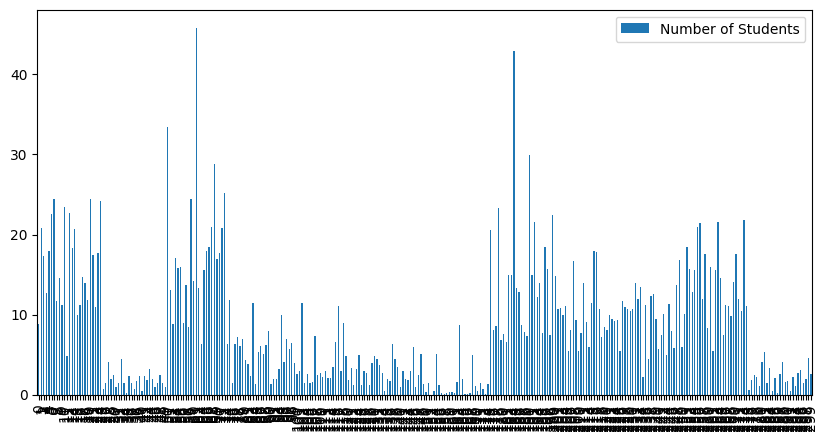

In [363]:
df_melted.plot(kind="bar",figsize=(10,5))

ugh... that doesn't look good. it's also treating percentages as numbers

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_70683/2629917399.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


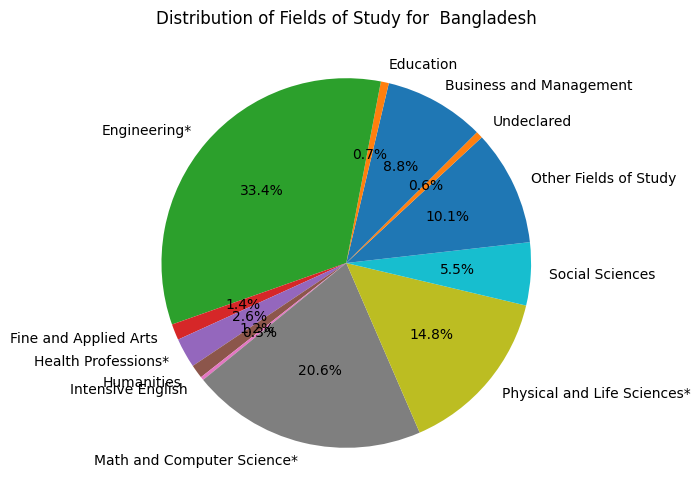

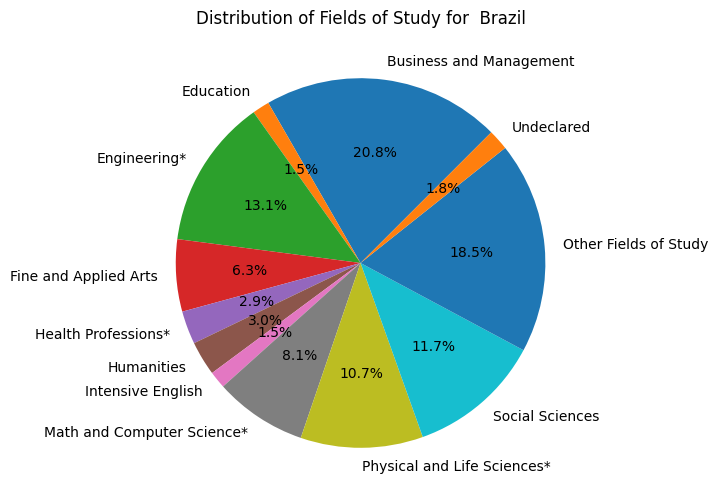

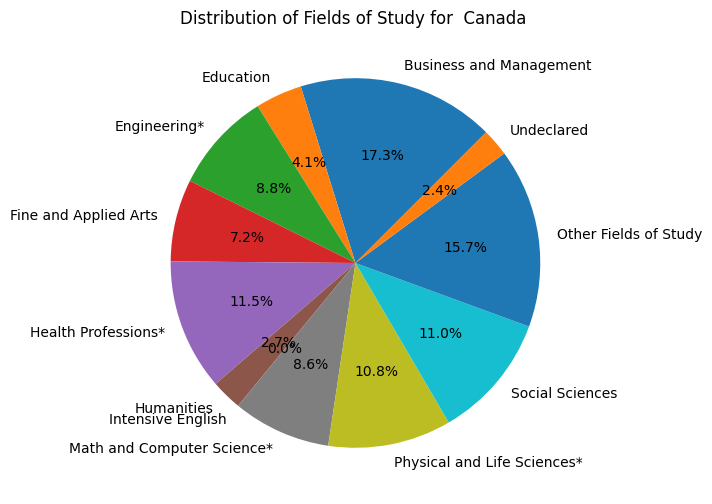

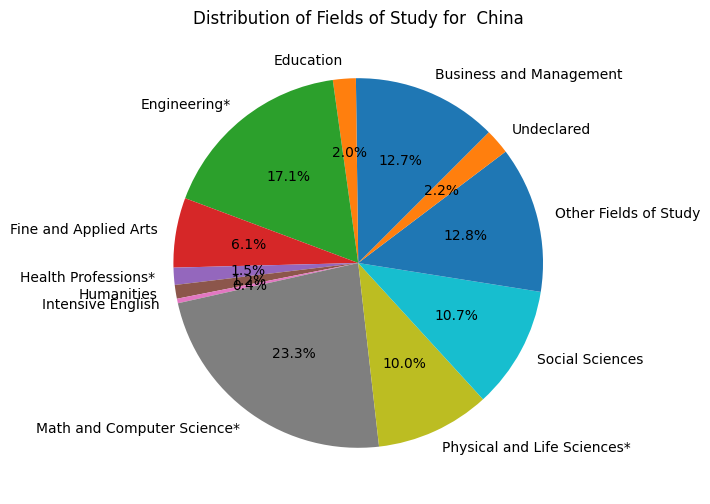

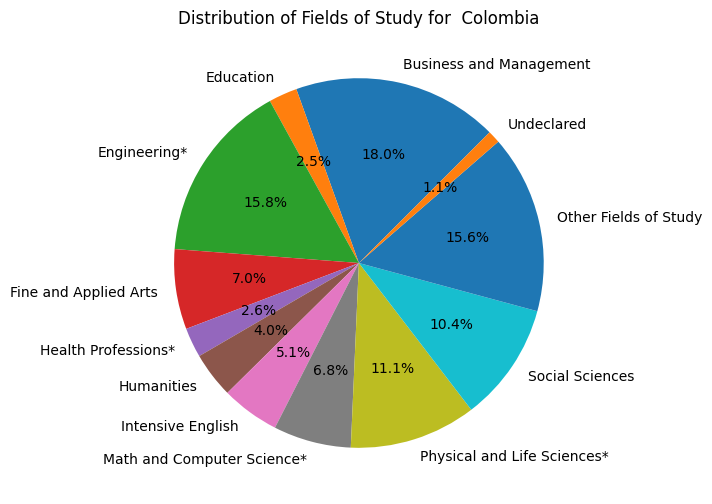

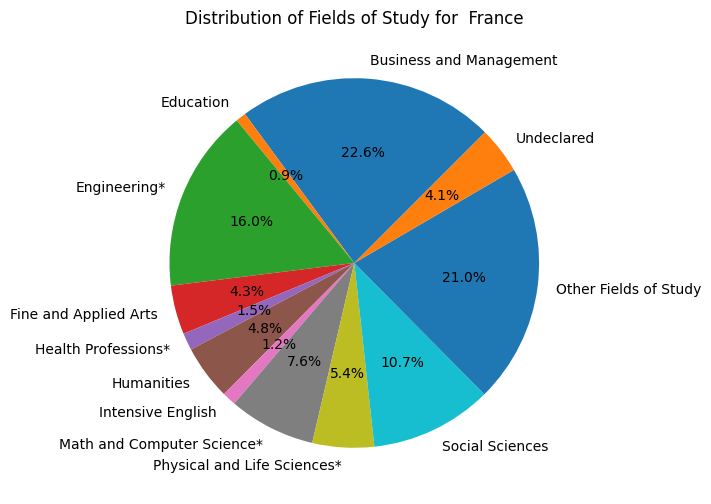

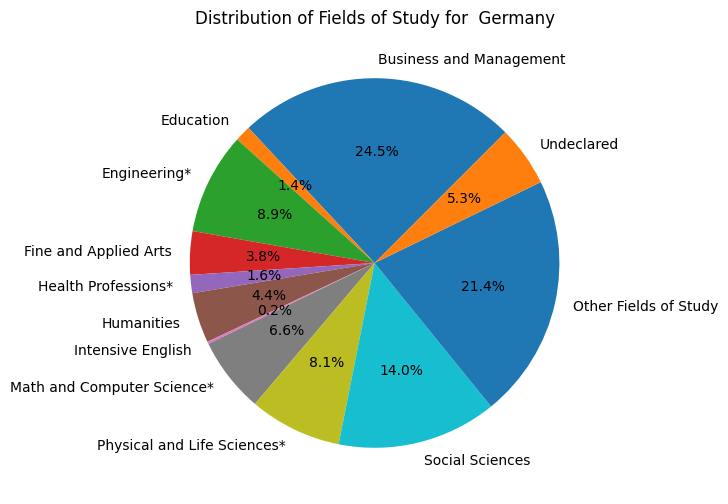

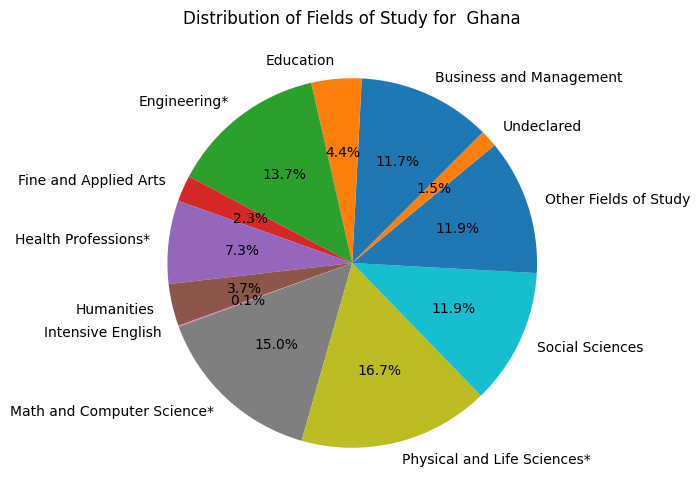

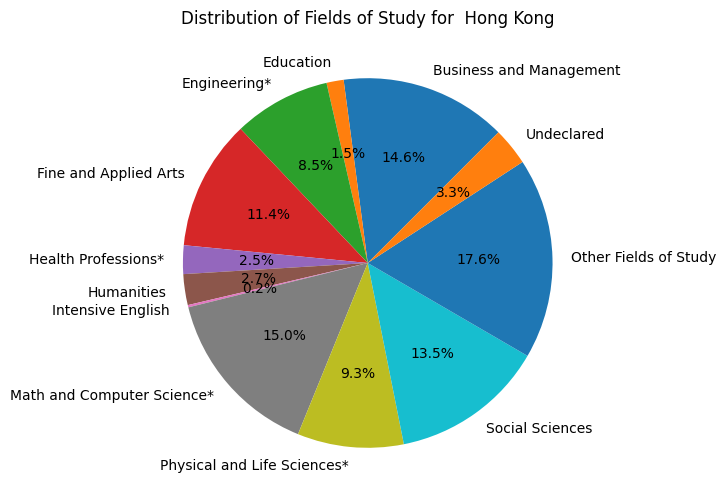

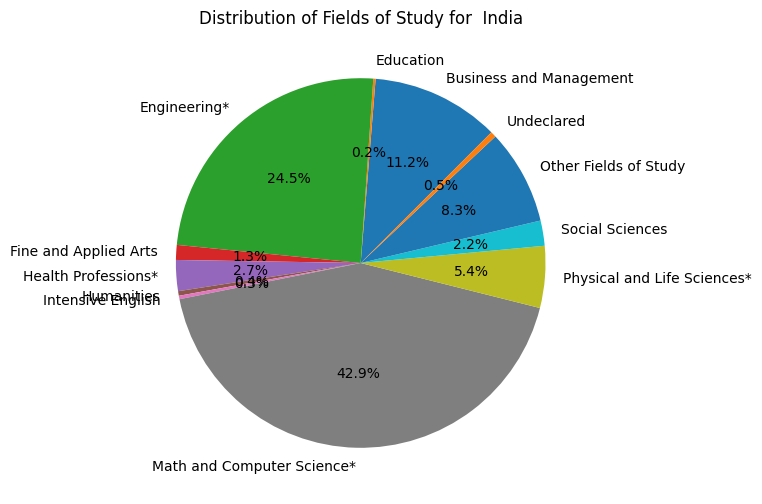

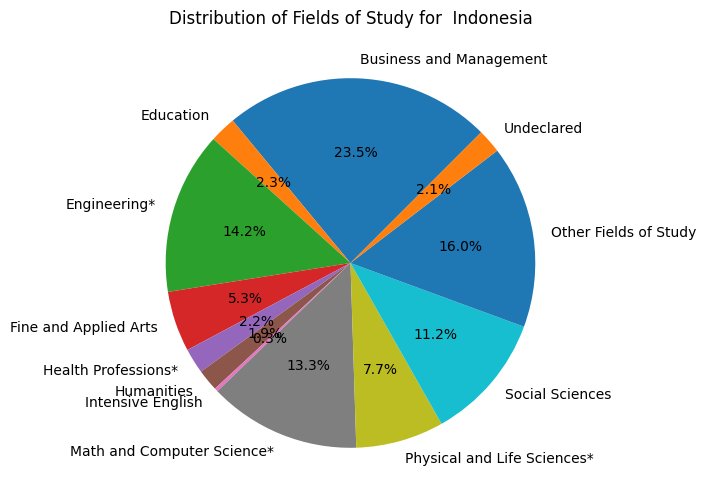

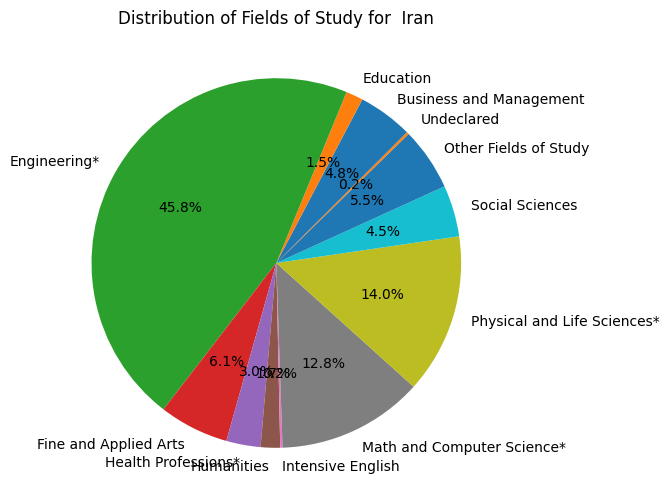

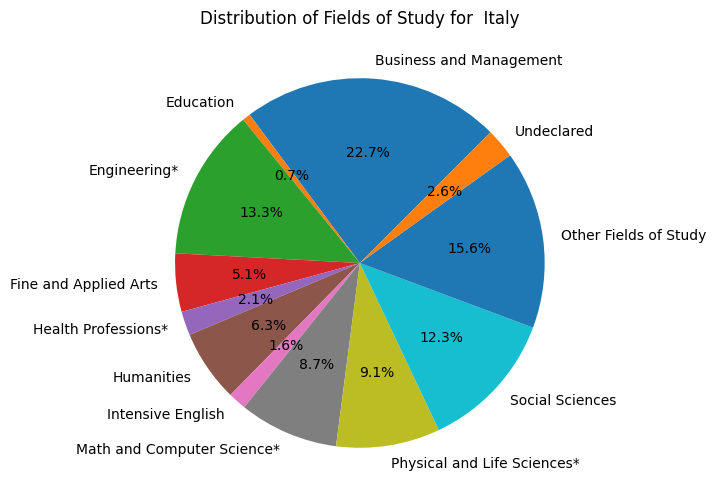

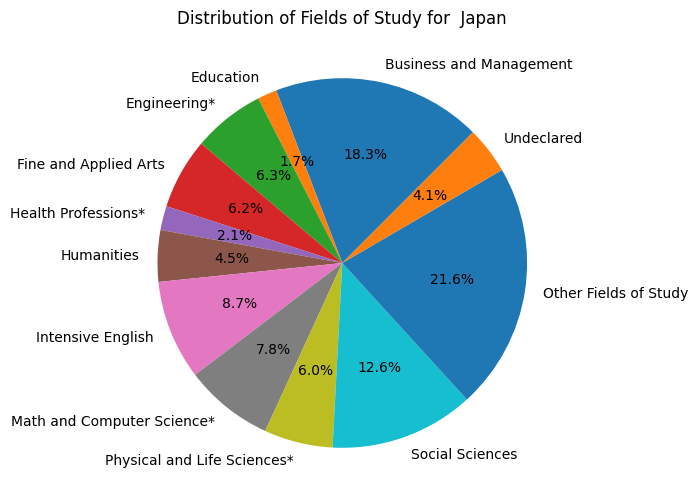

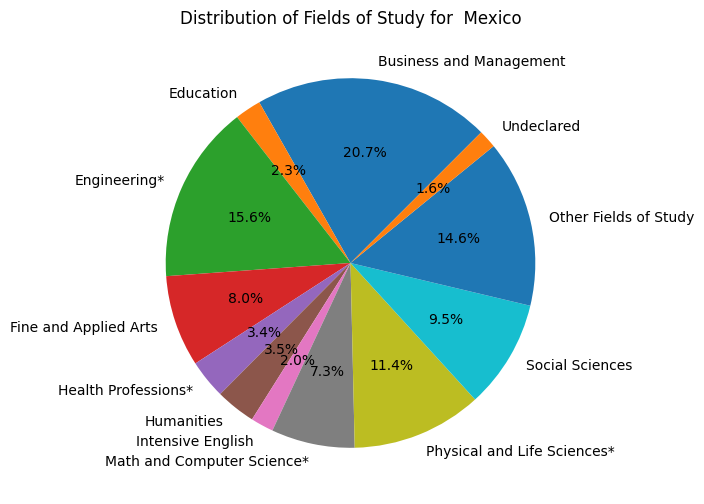

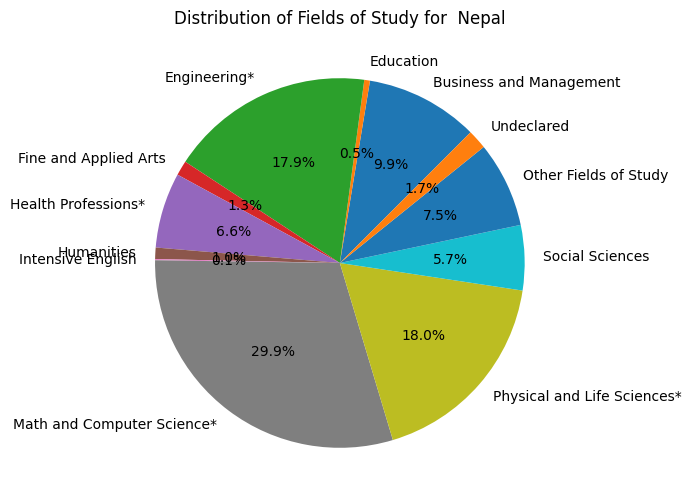

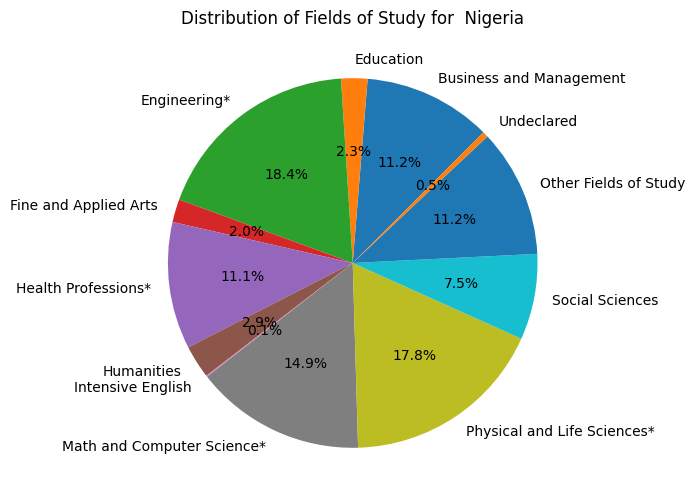

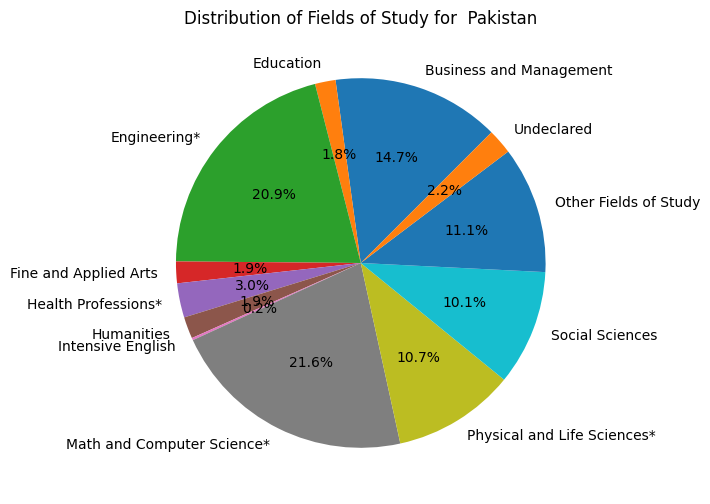

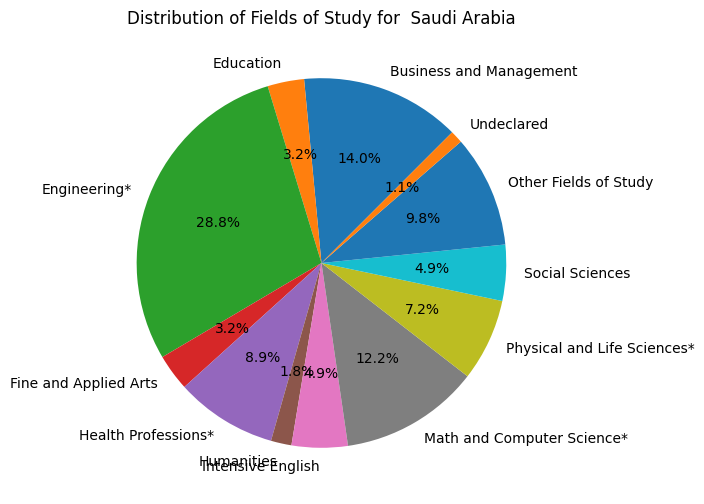

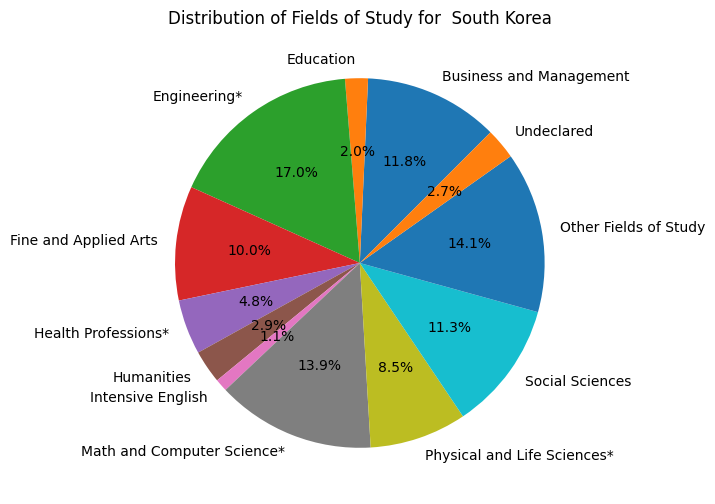

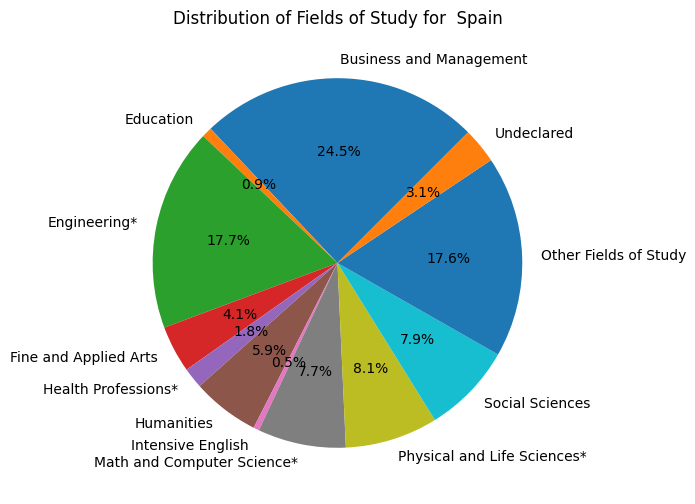

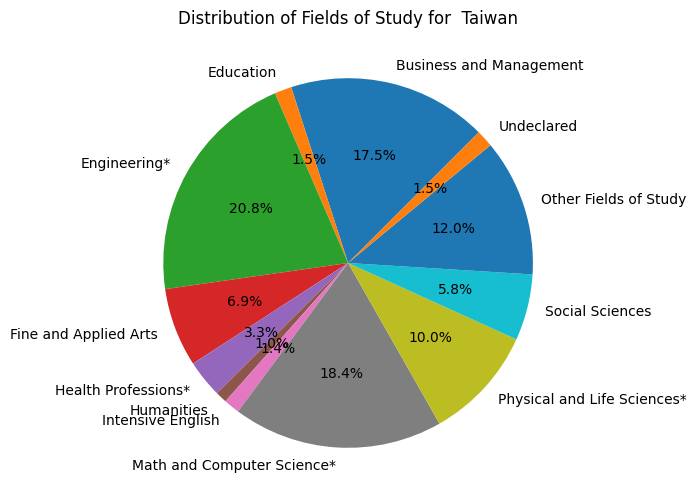

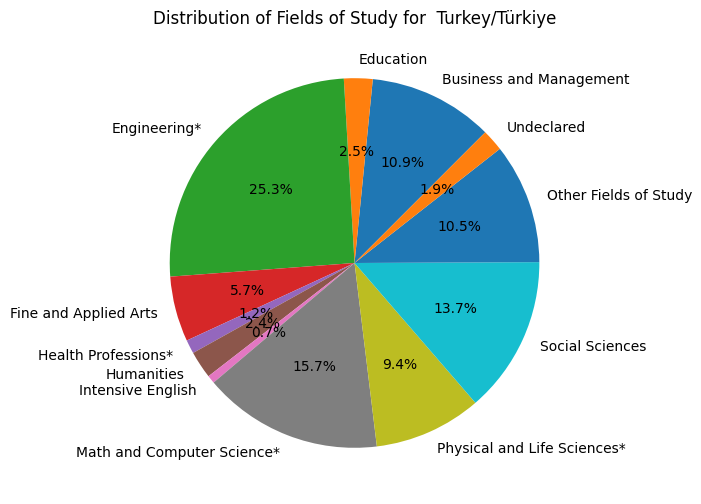

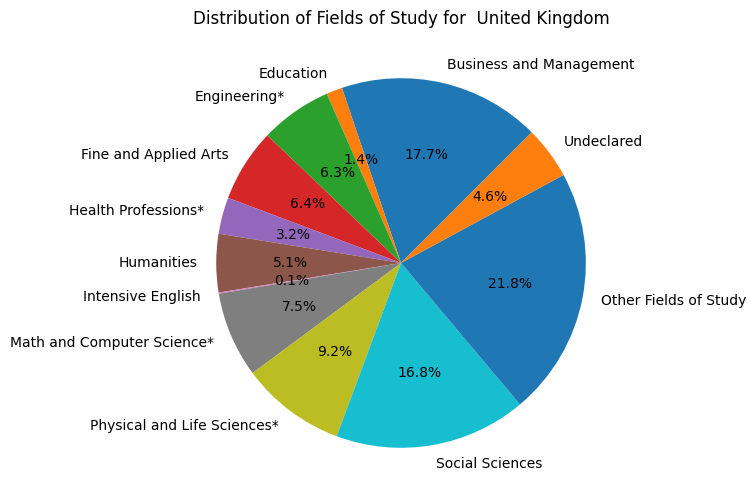

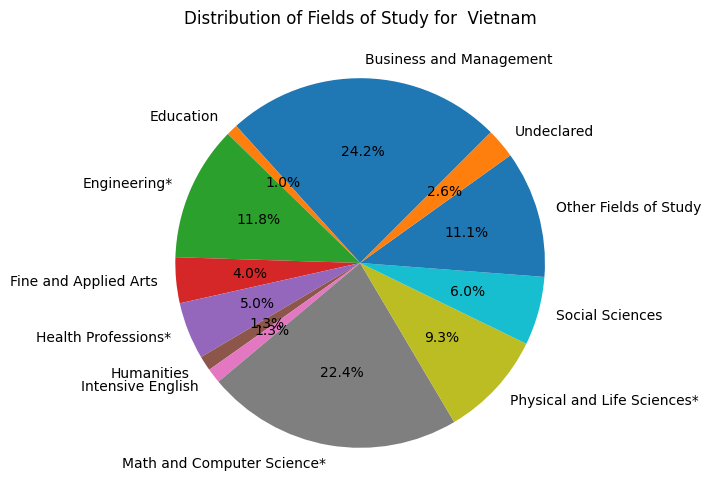

In [367]:
# chat - turning numbers into percentages
df_percentages = df_melted.copy()
df_percentages["Percentage"] = df_percentages.groupby("Place of Origin")["Number of Students"].transform(
    lambda x: 100 * x / x.sum()
)

for place in df_percentages["Place of Origin"].unique():
    place_data = df_percentages[df_percentages["Place of Origin"] == place]
    plt.figure(figsize=(8, 6))
    plt.pie(
        place_data["Percentage"], 
        labels=place_data["Field of Study"], 
        autopct="%.1f%%", 
        startangle=45
    )
    plt.title(f"Distribution of Fields of Study for {place}")

## ✍️ There seems to be a strong correlation between what people learn and their place of origin. A lot of students from Europe study business and mgmt, while a lot of students from “developing” countries in Asia study math, cs, engineering.

# 💡 where does the tuition come from?

In [368]:
%sqlcmd columns -t Primary_Funding_Academic_Level

+---------------+------+----------+---------+-------------+
|      name     | type | nullable | default | primary_key |
+---------------+------+----------+---------+-------------+
|   Unnamed: 0  | TEXT |   True   |   None  |      0      |
|    2023/24    | REAL |   True   |   None  |      0      |
|     Total     | REAL |   True   |   None  |      0      |
|   Unnamed: 3  | REAL |   True   |   None  |      0      |
| Undergraduate | REAL |   True   |   None  |      0      |
|    Graduate   | REAL |   True   |   None  |      0      |
|   Non-Degree  | REAL |   True   |   None  |      0      |
|      OPT      | REAL |   True   |   None  |      0      |
+---------------+------+----------+---------+-------------+

In [384]:
%%sql total_funding <<
SELECT "Unnamed: 0" AS Source, "2023/24"
FROM Primary_Funding_Academic_Level
WHERE "Unnamed: 0" NOT IN ('U.S. Funding Sources', 'International Funding Sources','Total Students')
ORDER BY "Source" DESC;

Running query in 'sqlite:///output_clear_named.db'

In [385]:
df_tf=total_funding.DataFrame()
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Source   9 non-null      object 
 1   2023/24  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 276.0+ bytes


<Axes: ylabel='Source'>

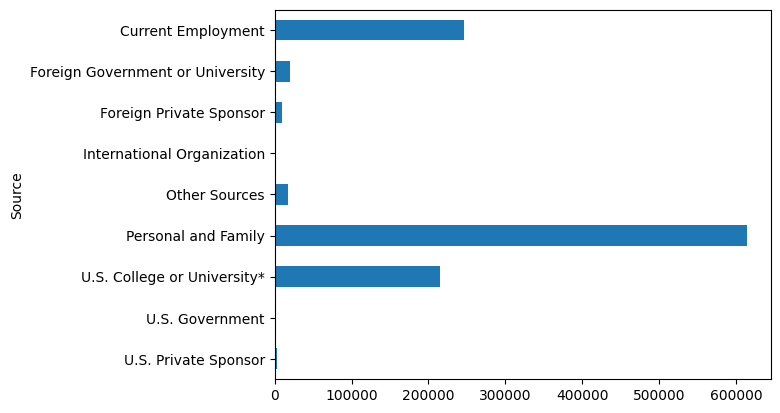

In [387]:
df_tf.plot(kind="barh",x="Source",legend=False)

## speficially to each academic level

In [388]:
%%sql al_funding <<
SELECT "Unnamed: 0" AS Source, "Undergraduate","Graduate","Non-Degree","OPT"
FROM Primary_Funding_Academic_Level
WHERE "Unnamed: 0" NOT IN ('U.S. Funding Sources', 'International Funding Sources','Total Students')
ORDER BY "Source" DESC;

Running query in 'sqlite:///output_clear_named.db'

In [389]:
df_alf=al_funding.DataFrame()
df_alf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Source         9 non-null      object 
 1   Undergraduate  9 non-null      float64
 2   Graduate       9 non-null      float64
 3   Non-Degree     9 non-null      float64
 4   OPT            9 non-null      float64
dtypes: float64(4), object(1)
memory usage: 492.0+ bytes


<Axes: ylabel='Source'>

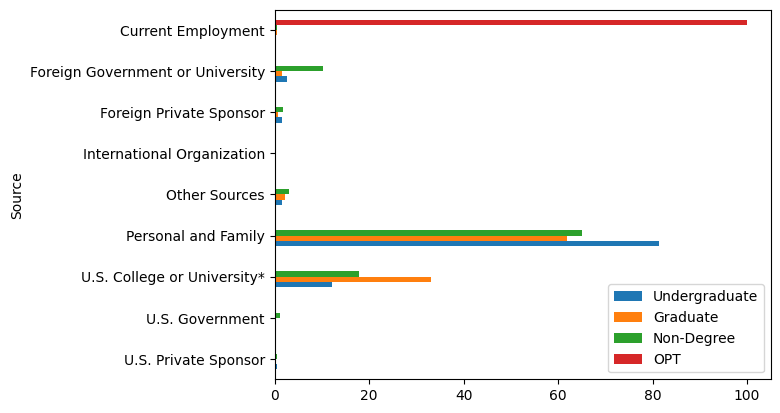

In [392]:
df_alf.plot(kind="barh",x="Source")

# ✍️ Mostly through personal and family funding. U.S. college/University sponsors more graduate > nondegree > undergrad, Foreign sponsors more non-degree (exchange program?), and current employment sponsors OPT 

(not sure how open doors defines "funding" OPT).